# Reading from a file

In [1]:
file = open("/Users/koller/Downloads/bg.txt", "r", encoding="utf-8")

Notice the `encoding="utf-8"` argument. This instructs the `open` function to assume that the text in the file is encoded with UTF-8. If you leave the `encoding` argument out, `open` uses the default character encoding of your operating system.

In [2]:
file.read()[:1000]


'Местните избори в Хърватия вървят към втори тур\nРезултатите показаха липса на категорични победи в първия тур, особено в повечето големи градове.\nА наблюдателите на изборите докладваха за нарушения на забраната за провеждане на кампании пред изборните секции в изборния ден.\nОт Наташа Радич за Southeast European Times от Загреб -- 21/05/09\nХърватите гласуваха в неделя (17 май) на местни и регионални избори. [Гети Имиджис]\nСлед като изборните секции бяха затворени в неделя (17 май) за местните избори, предварителните резултати показаха, че единствено в Риека от големите градове избирателите са избрали кмет на първия тур.\nВ другите градове на Хърватия нито един кандидат не спечели категорична победа.\nБяха пуснати общо 1,9 милиона бюлетини.\nЗа първи път, откакто Хърватия обяви независимост през 1991 г., избирателите пряко избраха 866 свои представители в 21 окръжни съвета, 2 206 представители в 126 градски съвета и 5 343 представители в 427 общински съвета.\nОбщо 46 325 кандидати 

The `read` method reads the entire file into one string. You can then manipulate this string as usual, e.g. by splitting it into its whitespace-separated parts using the `split` method.

In [3]:
"foo bar".split()

['foo', 'bar']

In [2]:
words = []

If instead of calling the `read` method, you simply iterate over the file object with a `for` loop, Python will process the file line by line.

The `extend` method adds all elements of one list to another list.

In [7]:
file = open("/Users/koller/Downloads/bg.txt", encoding="utf-8")
for line in file:
    words.extend(line.split())

In [8]:
words

['Местните',
 'избори',
 'в',
 'Хърватия',
 'вървят',
 'към',
 'втори',
 'тур',
 'Резултатите',
 'показаха',
 'липса',
 'на',
 'категорични',
 'победи',
 'в',
 'първия',
 'тур,',
 'особено',
 'в',
 'повечето',
 'големи',
 'градове.',
 'А',
 'наблюдателите',
 'на',
 'изборите',
 'докладваха',
 'за',
 'нарушения',
 'на',
 'забраната',
 'за',
 'провеждане',
 'на',
 'кампании',
 'пред',
 'изборните',
 'секции',
 'в',
 'изборния',
 'ден.',
 'От',
 'Наташа',
 'Радич',
 'за',
 'Southeast',
 'European',
 'Times',
 'от',
 'Загреб',
 '--',
 '21/05/09',
 'Хърватите',
 'гласуваха',
 'в',
 'неделя',
 '(17',
 'май)',
 'на',
 'местни',
 'и',
 'регионални',
 'избори.',
 '[Гети',
 'Имиджис]',
 'След',
 'като',
 'изборните',
 'секции',
 'бяха',
 'затворени',
 'в',
 'неделя',
 '(17',
 'май)',
 'за',
 'местните',
 'избори,',
 'предварителните',
 'резултати',
 'показаха,',
 'че',
 'единствено',
 'в',
 'Риека',
 'от',
 'големите',
 'градове',
 'избирателите',
 'са',
 'избрали',
 'кмет',
 'на',
 'първия',
 '

# Analyzing the corpus from the file

You can analyze the corpus you read from the file exactly like the one we got from `nltk.corpus.brown` earlier.

In [9]:
len(words)

4323846

In [10]:
len(set(words))

224070

In [11]:
import nltk
fdist = nltk.FreqDist(words)

In [12]:
high_freqs = sorted(fdist.values(), reverse=True)[:100]

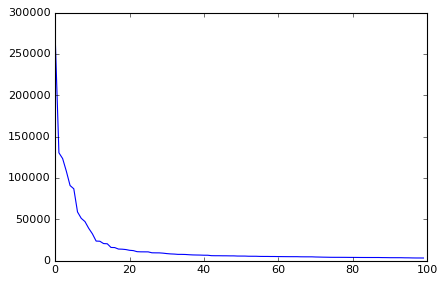

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot
matplotlib.pyplot.plot(high_freqs)

# Reading CSV files

One cool thing about Python is that the standard library already contains lots of functions and classes to make your life easier. Be sure to always check the standard library before you implement common functionality yourself. Here we play the name-learning game from Tuesday using a file in which course participants are given as tab-separated values (TSV). This can be done using the [CSV](https://docs.python.org/3/library/csv.html) module.

In [10]:
with open("participants.tsv", "r", encoding="utf-8") as file:
    print(file.read())


Name	Nationality	Program	Previous degree
Allén, Axel	FI	LST	BA English/Linguistics
Amin, Saadullah	PK	-- (DFKI)	BSc Electrical Engineering
Bernhard, Johannes	DE	LST	BA Comparative Linguistics
Bhanja, Ayushi	IN	LST	MA Linguistics
Chen, Yu-Wen	TW	LCT	BA Applied Foreign Languages
Christian, Katharina	DE	BSc Bioinformatik	
Das, Priyanka	IN	LST	M.Tech Computer Science & Engineering
Donatelli, Lucia	US	--	PhD Linguistics
Georgis, Philipp	US	LST	BA Linguistics


In [14]:
import csv

with open("participants.tsv", "r", encoding="utf-8") as file:
    csv_reader = csv.reader(file, delimiter='\t')
    next(csv_reader) # skip first line, it is just the header
    participants = []
    
    for row in csv_reader:
        participants.append(row)

participants

[['Allén, Axel', 'FI', 'LST', 'BA English/Linguistics'],
 ['Amin, Saadullah', 'PK', '-- (DFKI)', 'BSc Electrical Engineering'],
 ['Bernhard, Johannes', 'DE', 'LST', 'BA Comparative Linguistics'],
 ['Bhanja, Ayushi', 'IN', 'LST', 'MA Linguistics'],
 ['Chen, Yu-Wen', 'TW', 'LCT', 'BA Applied Foreign Languages'],
 ['Christian, Katharina', 'DE', 'BSc Bioinformatik', ''],
 ['Das, Priyanka', 'IN', 'LST', 'M.Tech Computer Science & Engineering'],
 ['Donatelli, Lucia', 'US', '--', 'PhD Linguistics'],
 ['Georgis, Philipp', 'US', 'LST', 'BA Linguistics']]

In [17]:
for i in range(len(participants)):
    me = participants[i]
    print(f"I am {me[0]} from {me[1]}, and my degree is {me[3]}.")
    for j in range(i):
        print(f"   He/she is {participants[j][0]} from {participants[j][1]}.")
    print()

I am Allén, Axel from FI, and my degree is BA English/Linguistics.

I am Amin, Saadullah from PK, and my degree is BSc Electrical Engineering.
   He/she is Allén, Axel from FI.

I am Bernhard, Johannes from DE, and my degree is BA Comparative Linguistics.
   He/she is Allén, Axel from FI.
   He/she is Amin, Saadullah from PK.

I am Bhanja, Ayushi from IN, and my degree is MA Linguistics.
   He/she is Allén, Axel from FI.
   He/she is Amin, Saadullah from PK.
   He/she is Bernhard, Johannes from DE.

I am Chen, Yu-Wen from TW, and my degree is BA Applied Foreign Languages.
   He/she is Allén, Axel from FI.
   He/she is Amin, Saadullah from PK.
   He/she is Bernhard, Johannes from DE.
   He/she is Bhanja, Ayushi from IN.

I am Christian, Katharina from DE, and my degree is .
   He/she is Allén, Axel from FI.
   He/she is Amin, Saadullah from PK.
   He/she is Bernhard, Johannes from DE.
   He/she is Bhanja, Ayushi from IN.
   He/she is Chen, Yu-Wen from TW.

I am Das, Priyanka from IN, an